#Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import matplotlib.dates as mdates
from datetime import datetime

#Reading the dataset

In [3]:
from google.colab import files
uploaded= files.upload()

Saving Crop Production data.csv to Crop Production data.csv


#Import File

In [4]:
df = pd.read_csv('Crop Production data.csv')
# To preview the top 5 rows of the dataset
df.head(5)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [5]:
# Find the Null Values:

df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [6]:
# Calculate the median Production for each State_Name and Crop_Year combination
median_production = df.groupby(['State_Name', 'Crop_Year'])['Production'].median()

# Fill missing Production values using the calculated medians
df['Production'] = df.apply(lambda row: median_production[row['State_Name'], row['Crop_Year']] if pd.isnull(row['Production']) else row['Production'], axis=1)


In [7]:
# After Filling Null values, Show the Result:

df.isnull().any()

,0
State_Name,False
District_Name,False
Crop_Year,False
Season,False
Crop,False
Area,False
Production,False


In [8]:
# Show the Data info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [9]:
# Check the Duplicate Values:

df.duplicated().sum()

0

In [10]:
df.shape

(246091, 7)

<Axes: >

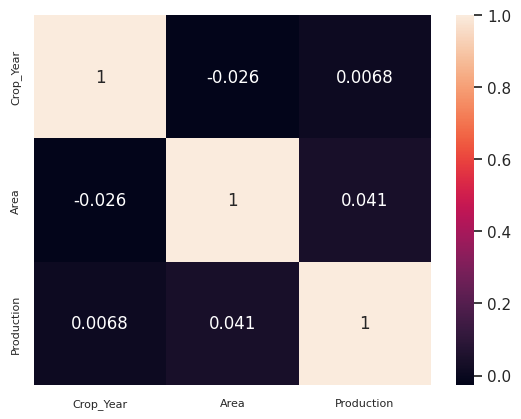

In [11]:
# Checking for correlation between variables

numeric_df = df.select_dtypes(include=['number'])

plt.tick_params(labelsize=8)
sns.heatmap(numeric_df.corr(),annot=True)

**Result :** There is no high relationship between any variables

In [12]:
# Show How many state have There:

print(df['State_Name'].nunique())
print(df['State_Name'].unique())

33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [13]:
# Show Top Rich Agriculture States:

df['State_Name'].value_counts()

,count
State_Name,
Uttar Pradesh,33306
Madhya Pradesh,22943
Karnataka,21122
Bihar,18885
Assam,14628
Odisha,13575
Tamil Nadu,13547
Maharashtra,12628
Rajasthan,12514


**Result:** Here, totally 33 unique states and there have more data from the top rich agriculture states like Uttar pradhesh , Madhya Pradesh and Karnataka

In [14]:
# Show the District Name:

print(df['District_Name'].nunique())
print(df['District_Name'].unique())

646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP'
 'KAMRUP METRO' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MARIGAON' 'NAGAON' 'NALBARI' 'SIVASAGAR' 'SONITPUR' 'TINSUKIA'
 'UDALGURI' 'ARARIA' 'ARWAL' 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR'
 'BHOJPUR' 'BUXAR' 'DARBHANGA' 'GAYA' 'GOPALGANJ' 'JAMUI' 'JEHANABAD'
 'KAIMUR (BHABUA)' 'KATIHAR' 'KHAGARIA' 'KISHANGANJ' 'LAKHISARAI'
 'MADHEPURA' 'MADHUBANI' 'MUNGER'

In [15]:
# Top District for Agriculture:

df['District_Name'].value_counts()

,count
District_Name,
BIJAPUR,945
TUMKUR,936
BELGAUM,925
HASSAN,895
BELLARY,887
...,...
HYDERABAD,8
KHUNTI,6
RAMGARH,6


**Result:** The top rich agriculture district like BIJAPUR, TUMKUR,	BELGAUM,	HASSAN, 	BELLARY



In [16]:
# Crop Years

print(df['Crop_Year'].nunique())
print(df['Crop_Year'].max())
print(df['Crop_Year'].min())

19
2015
1997


In [17]:
# Crop Years Value Count:

df.Crop_Year.value_counts()

,count
Crop_Year,
2003,17287
2002,16671
2008,14550
2007,14526
2006,14328
2004,14117
2009,14116
2011,14071
2010,14065


**Result :** Data consists for India crop production from 1997 to 2015 , more vital data from 2003 and 2002.

In [18]:
# Check Seasons:

df['Season'].nunique()
df['Season'].max()
df['Season'].value_counts()

,count
Season,
Kharif,95951
Rabi,66987
Whole Year,57305
Summer,14841
Winter,6058
Autumn,4949


**Result:** Kharif is the top then Rabi then Whole Year then Summer then Winter and Autumn there have lowest produced crop season

In [19]:
# Check Crop

print(df['Crop'].nunique())
print(df.Crop.value_counts().head(10))
df['Crop'].max()
df['Crop'].unique()

124
Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: count, dtype: int64


array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

**Result :** 124 Unique crops available

In [20]:
df.Production.describe()

,Production
count,2.460910e+05
mean,5.737050e+05
std,1.693613e+07
min,0.000000e+00
25%,9.100000e+01
50%,7.420000e+02
75%,6.780500e+03
max,1.250800e+09


**Result:** Production value ranges from 0 to 1250800

{'whiskers': [<matplotlib.lines.Line2D at 0x78e1c1352b90>,
 'caps': [<matplotlib.lines.Line2D at 0x78e1c1353040>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e1c13528f0>],
 'medians': [<matplotlib.lines.Line2D at 0x78e1c1353580>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e1c1353820>],
 'means': []}

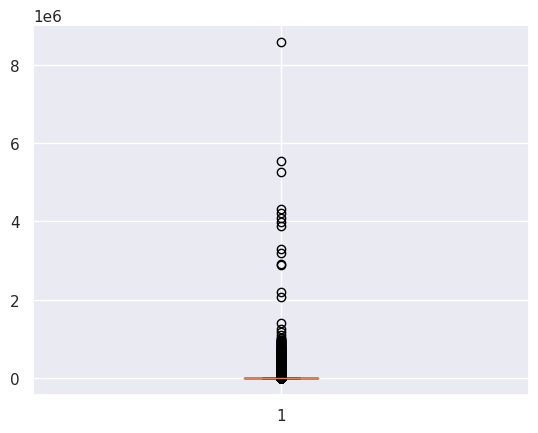

In [21]:
plt.boxplot(df.Area)

{'whiskers': [<matplotlib.lines.Line2D at 0x78e1c1561000>,
 'caps': [<matplotlib.lines.Line2D at 0x78e1c1561540>,
 'boxes': [<matplotlib.lines.Line2D at 0x78e1c1560d60>],
 'medians': [<matplotlib.lines.Line2D at 0x78e1c1561a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x78e1c1561d20>],
 'means': []}

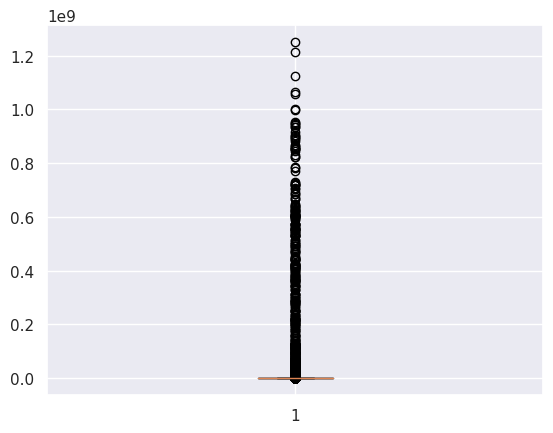

In [22]:
plt.boxplot(df.Production)

**Result:** The area under cultivation and production is highly skewed and has many outliers

In [23]:
#Zone-Wise Production - 1997-2014

north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [24]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        value = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        value = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        value = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        value = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        value = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        value = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        value = 'Union Territory'
    else:
        value = 'No Value'
    return value

df['Zones'] = df.apply(get_zonal_names, axis=1)
df['Zones'].unique()

array(['Union Territory', 'South Zone', 'NE Zone', 'East Zone',
       'North Zone', 'Central Zone', 'West Zone'], dtype=object)

In [25]:
df['Zones'].value_counts()

,count
Zones,
South Zone,54207
North Zone,51468
East Zone,43339
West Zone,33786
Central Zone,33652
NE Zone,28297
Union Territory,1342


Text(0.5, 1.0, 'Zone wise total production')

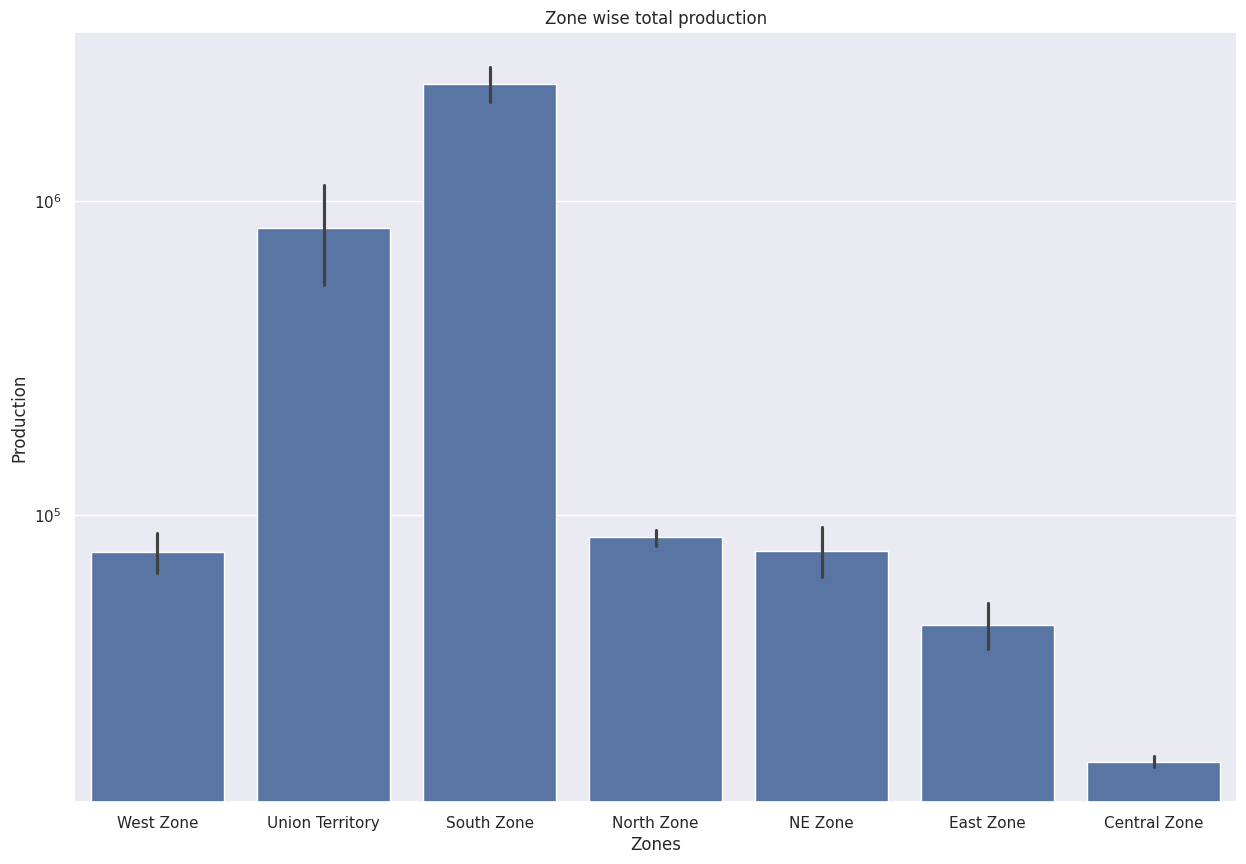

In [26]:
# Zone wise production

fig ,ax = plt.subplots(figsize=(15,10))
sns.barplot(x='Zones', y='Production', data=df.sort_values('Zones', ascending=False))
plt.xlabel('Zones')
plt.ylabel('Production')
plt.yscale('log')
plt.title('Zone wise total production')

Text(0.5, 1.0, 'Overall Crops vs Production')

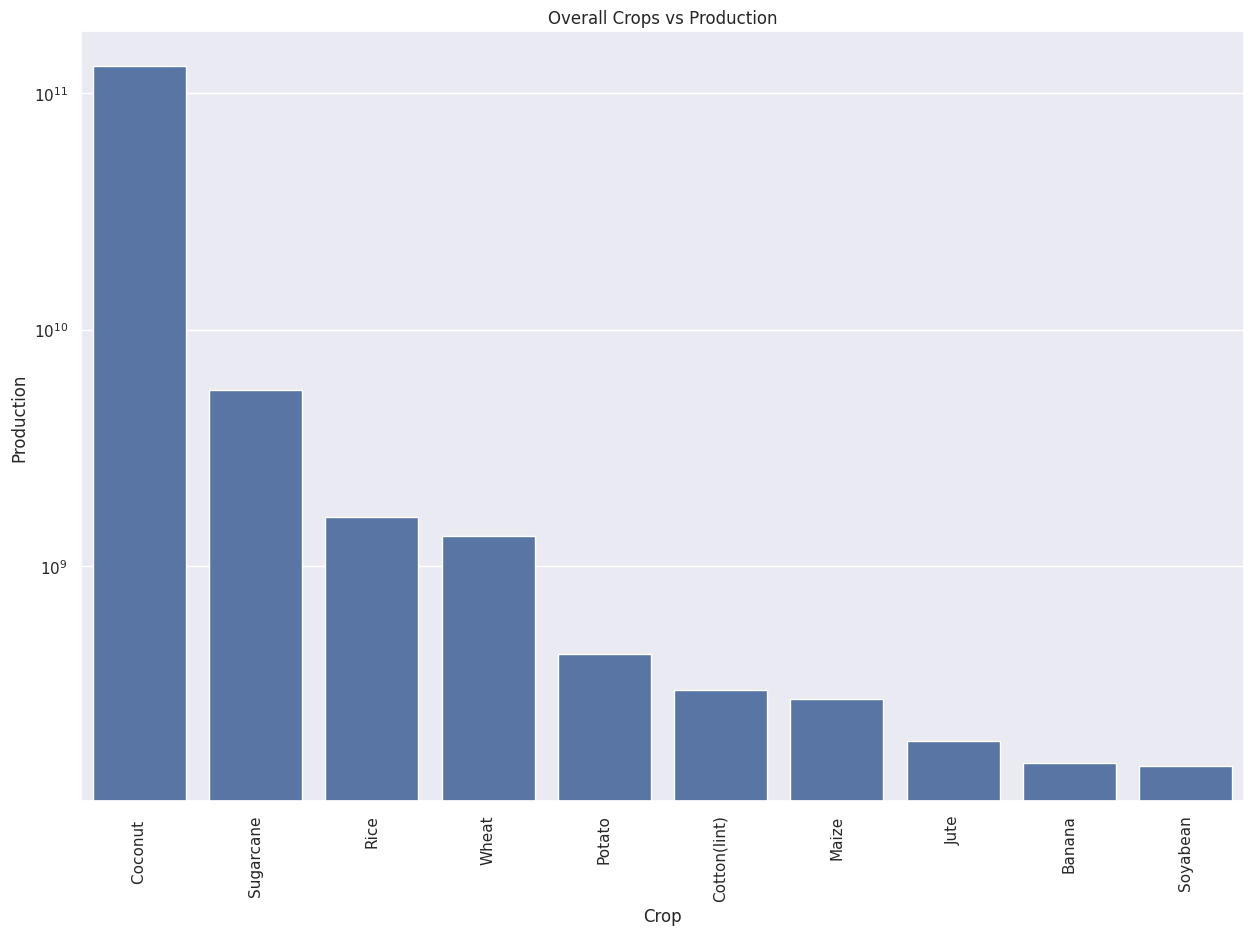

In [27]:
# Crop wise production

crop = df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop
fig, ax = plt.subplots(figsize=(15,10))
# Pass the entire DataFrame and specify x and y columns
sns.barplot(x='Crop', y='Production', data=crop)
plt.xlabel('Crop')
plt.ylabel('Production')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Overall Crops vs Production')

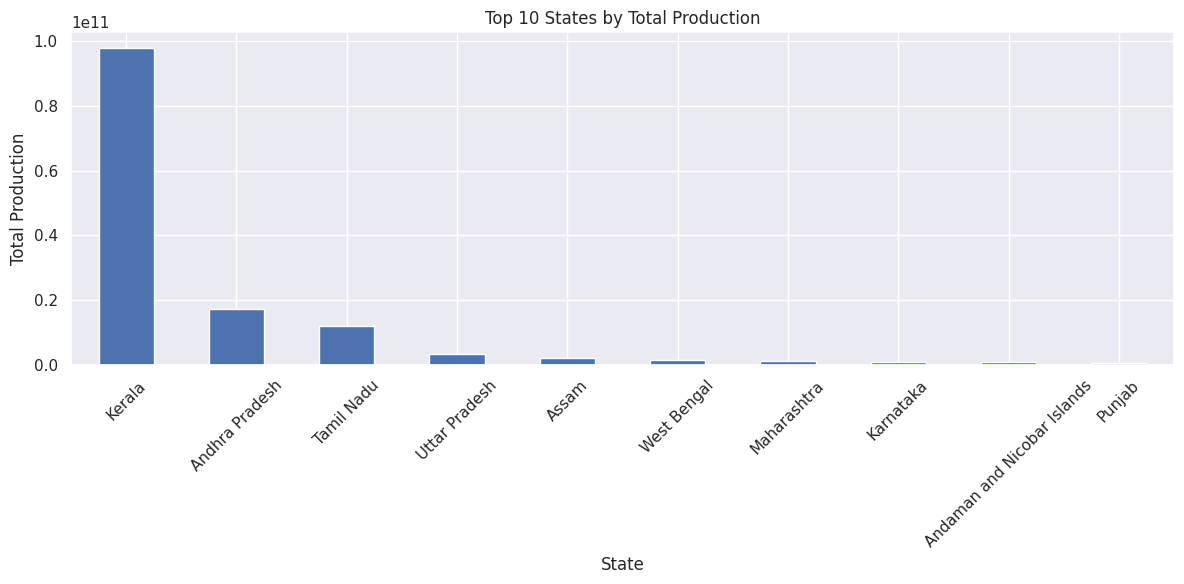

In [28]:
# Group the data by state and calculate the total production for each state
state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)

# Select the top 10 states
top_10_states = state_production.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_states.plot(kind='bar')
plt.title('Top 10 States by Total Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Result :** Kerala is the top for Production


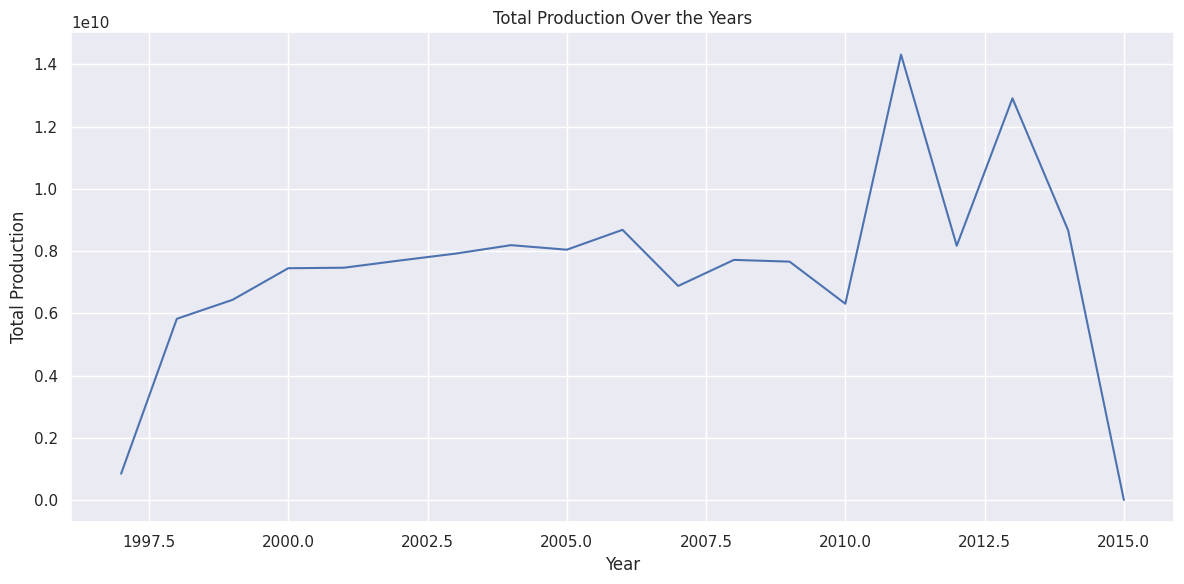

In [29]:
# Group the data by year and calculate the total production for each year
yearly_production = df.groupby('Crop_Year')['Production'].sum()

# Create a line plot
plt.figure(figsize=(12, 6))
yearly_production.plot(kind='line')
plt.title('Total Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.tight_layout()
plt.show()

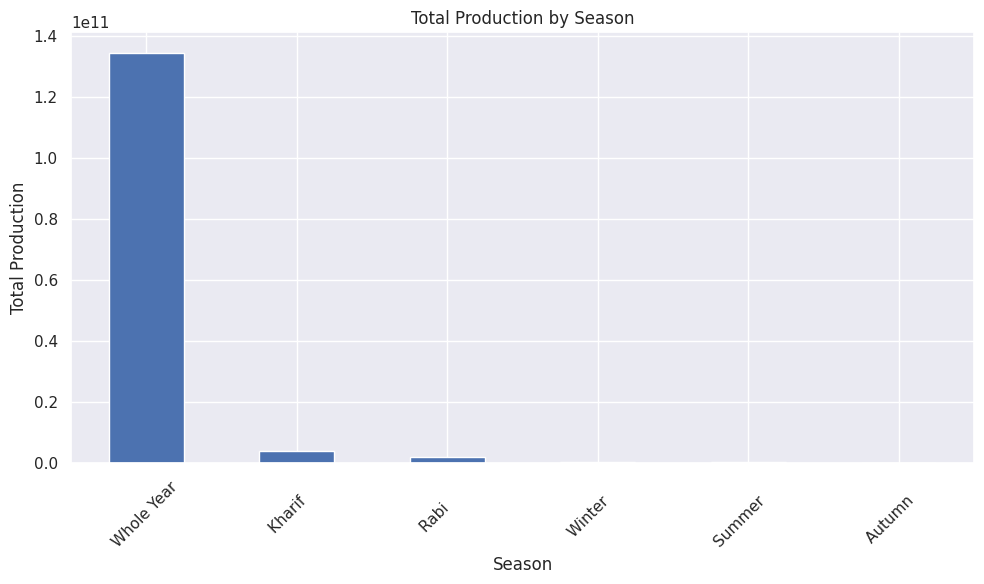

In [30]:
# Group the data by season and calculate the total production for each season
seasonal_production = df.groupby('Season')['Production'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
seasonal_production.plot(kind='bar')
plt.title('Total Production by Season')
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

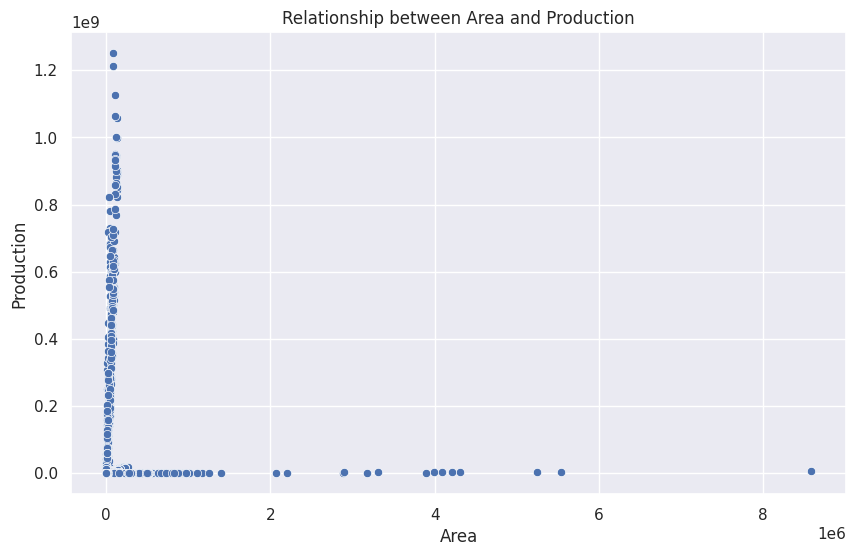

In [31]:
# Relationship between Area and Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=df)
plt.title('Relationship between Area and Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()


In [32]:
# Top producing districts for each crop
top_districts_by_crop = df.groupby(['Crop', 'District_Name'])['Production'].sum().reset_index()
top_districts_by_crop = top_districts_by_crop.sort_values(['Crop', 'Production'], ascending=[True, False])
top_districts_by_crop = top_districts_by_crop.groupby('Crop').head(3)  # Top 3 districts for each crop
print(top_districts_by_crop)

                      Crop   District_Name  Production
0                    Apple        DINDIGUL         0.0
1                    Apple    THE NILGIRIS         0.0
9      Arcanut (Processed)  DAKSHIN KANNAD     48292.0
18     Arcanut (Processed)         SHIMOGA     40216.0
10     Arcanut (Processed)       DAVANGERE     20154.0
...                    ...             ...         ...
22309   other misc. pulses          CACHAR      1155.0
22321   other misc. pulses      HAILAKANDI       687.0
22513       other oilseeds   WEST GODAVARI   2234466.0
22403       other oilseeds   EAST GODAVARI    604214.0
22437       other oilseeds         KRISHNA    273813.0

[368 rows x 3 columns]


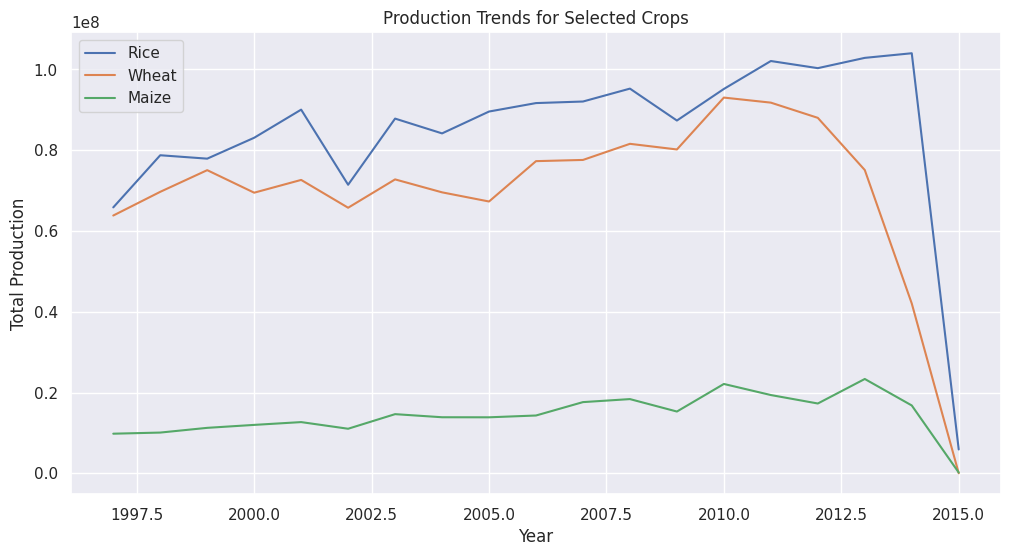

In [33]:
# Production trends for specific crops over the years
selected_crops = ['Rice', 'Wheat', 'Maize']
plt.figure(figsize=(12, 6))
for crop in selected_crops:
    crop_data = df[df['Crop'] == crop]
    yearly_production = crop_data.groupby('Crop_Year')['Production'].sum()
    plt.plot(yearly_production.index, yearly_production.values, label=crop)
plt.title('Production Trends for Selected Crops')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.show()

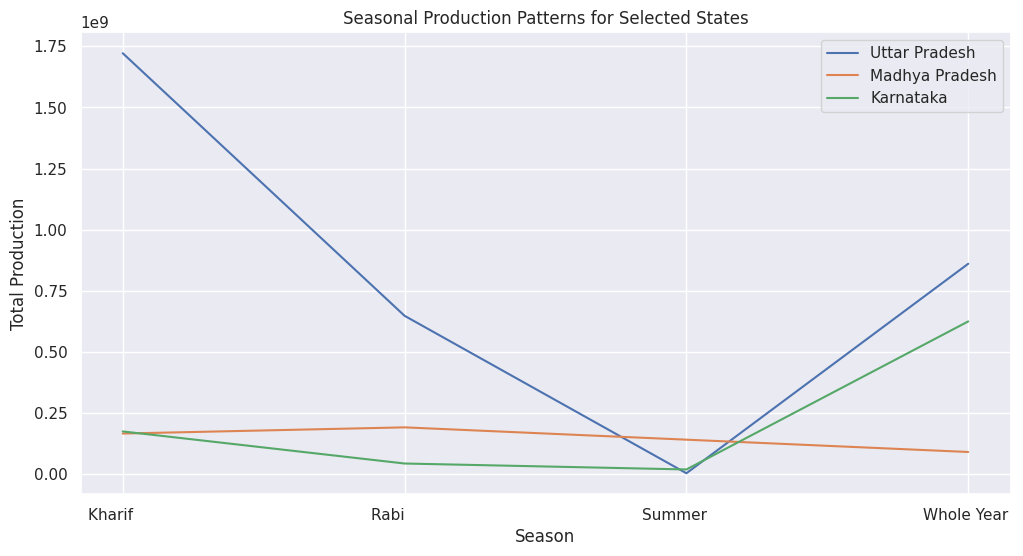

In [34]:
# Seasonal production patterns for specific states
selected_states = ['Uttar Pradesh', 'Madhya Pradesh', 'Karnataka']
plt.figure(figsize=(12, 6))
for state in selected_states:
    state_data = df[df['State_Name'] == state]
    seasonal_production = state_data.groupby('Season')['Production'].sum()
    plt.plot(seasonal_production.index, seasonal_production.values, label=state)
plt.title('Seasonal Production Patterns for Selected States')
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.legend()
plt.show()

<Figure size 1200x600 with 0 Axes>

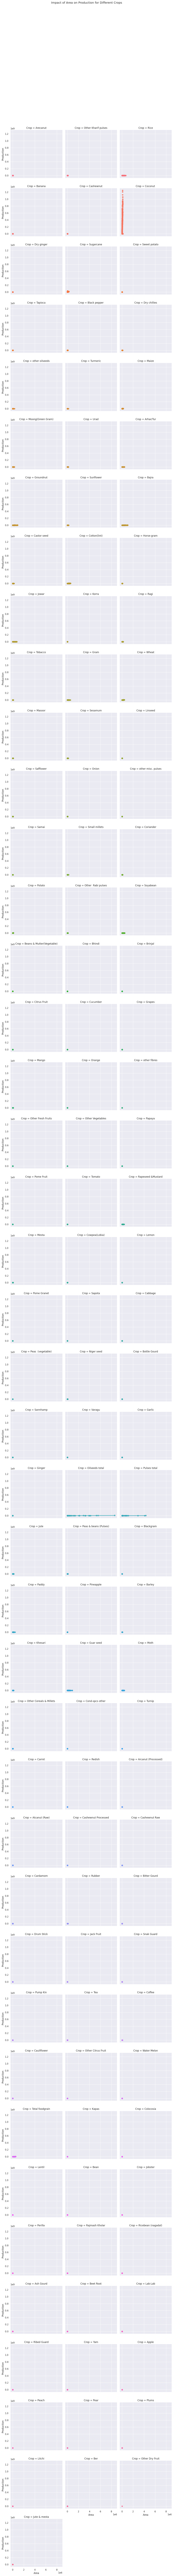

In [35]:
# Impact of area on production for different crops
plt.figure(figsize=(12, 6))
sns.lmplot(x='Area', y='Production', data=df, hue='Crop', col='Crop', col_wrap=3, height=4)
plt.suptitle('Impact of Area on Production for Different Crops', y=1.05)
plt.show()

<Axes: xlabel='State_Name'>

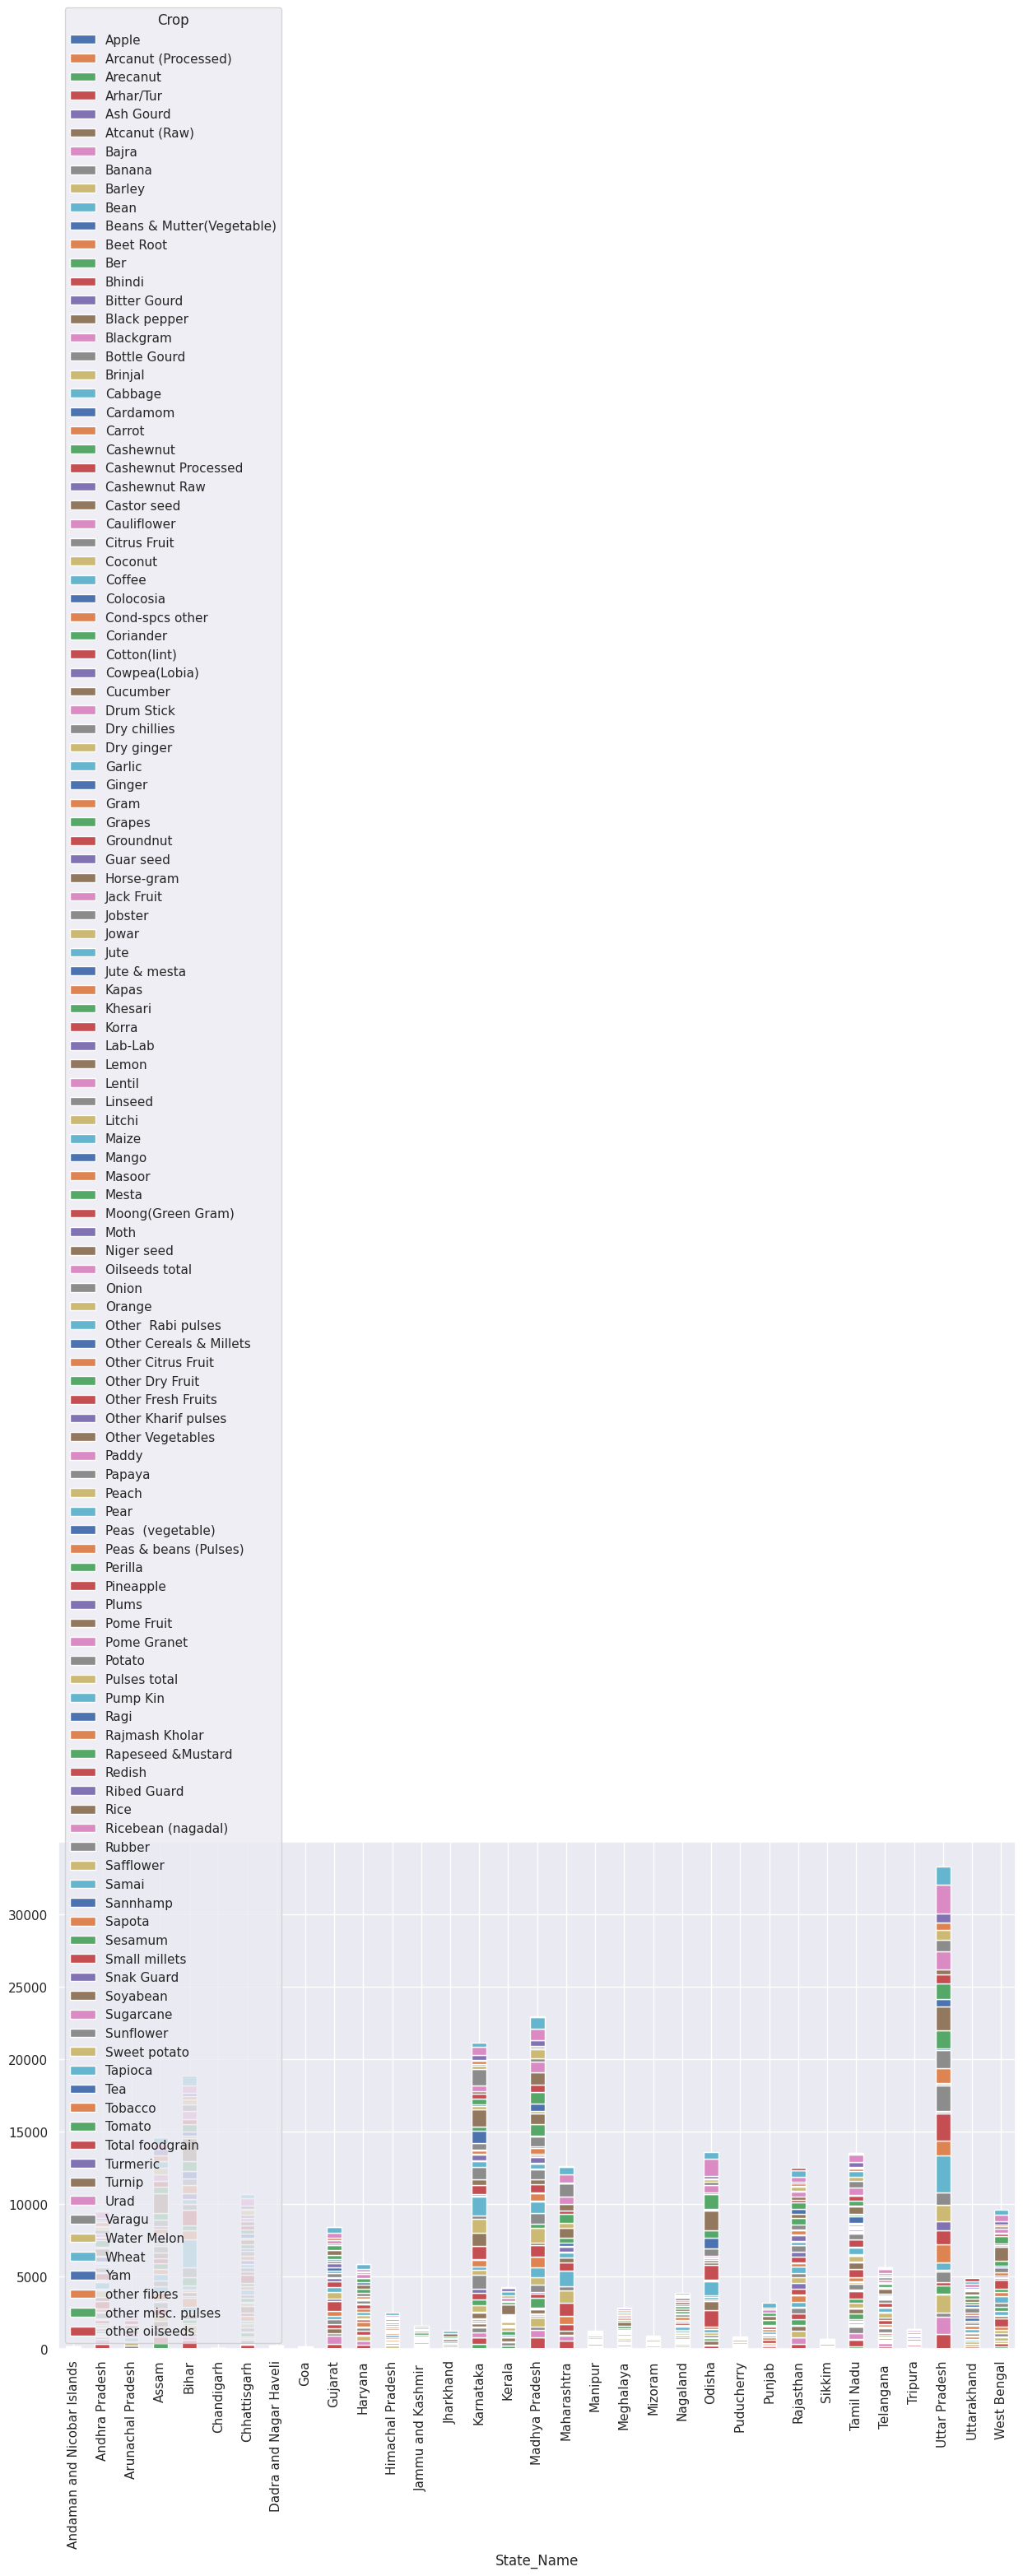

In [36]:
# State that dominates in crop production by producing a variety of crop categories


state_cat_crop= pd.crosstab(df['State_Name'],df['Crop'])
state_cat_crop.plot(kind="bar",stacked=True,figsize=(15,8))

**Result:**

* Top crop grown in Southern Zone is coconut.

* The coconut gets matured in Whole year season.

* Kerala state in southern zone yeilds a high amount of Coconut.

* Coconut production was yeilded more during 2011 and 2014.

* High coconut cultivation is directly proportional to area under cultivation.